Can autoencoders be used or semantic segmentation?

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model


In [12]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Read image and corresponding mask

In [13]:
SIZE=512

Read the image

In [14]:
img=cv2.imread('/content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/Copy of imgx1.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
print(img.shape)

(512, 512, 3)


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
#Get image shape ready for the network
img_array = np.expand_dims(img, axis=0)
print(img_array.shape)

(1, 512, 512, 3)


Read the mask

In [16]:
mask=cv2.imread('/content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/Copy of imgy1.jpg', 1)   #Change 1 to 0 for grey images

mask=cv2.resize(mask,(SIZE, SIZE))
print(mask.shape)


(512, 512, 3)


In [17]:
mask_array = np.expand_dims(mask, axis=0) #Expand dim along axis 0 to get it to the right shape for the network
print(mask_array.shape)

(1, 512, 512, 3)


In [18]:
img_array = img_array.astype('float32') / 255.  #Scale image pixel values to between 0 and 1
mask_array = mask_array.astype('float32') / 255.  #Mask has values 0, 255 - scale them to 0 and 1.


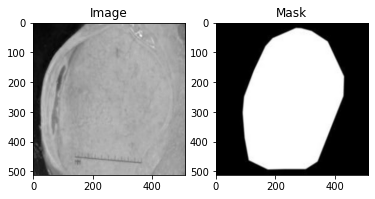

In [19]:
plt.subplot(1,2,1)
plt.imshow(img_array[0,:,:,0],cmap='gray')
plt.title('Image')
plt.subplot(1,2,2)
plt.imshow(mask_array[0,:,:,:],cmap='gray')
plt.title('Mask')
plt.show()

In [20]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  #Using binary cross entropy loss. Try other losses. 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 256)     295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 256)      0

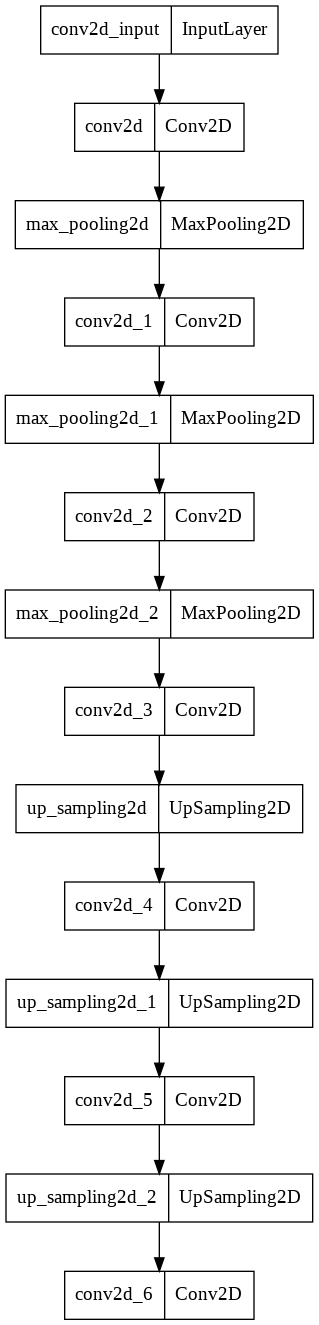

In [23]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_layer_names=True)

In [22]:
model.fit(img_array, mask_array, epochs=500) #If the model does not converge try a few times....


Epoch 1/500
1/1 [==============================] - 13s 13s/step - loss: 0.6932 - accuracy: 0.9794
Epoch 2/500
1/1 [==============================] - 0s 48ms/step - loss: 0.6926 - accuracy: 0.9824
Epoch 3/500
1/1 [==============================] - 0s 46ms/step - loss: 0.6920 - accuracy: 0.0139
Epoch 4/500
1/1 [==============================] - 0s 46ms/step - loss: 0.6878 - accuracy: 0.2670
Epoch 5/500
1/1 [==============================] - 0s 44ms/step - loss: 0.6784 - accuracy: 0.0882
Epoch 6/500
1/1 [==============================] - 0s 45ms/step - loss: 0.6535 - accuracy: 0.1697
Epoch 7/500
1/1 [==============================] - 0s 47ms/step - loss: 0.6999 - accuracy: 0.0937
Epoch 8/500
1/1 [==============================] - 0s 50ms/step - loss: 0.7469 - accuracy: 0.9951
Epoch 9/500
1/1 [==============================] - 0s 45ms/step - loss: 0.6341 - accuracy: 0.1348
Epoch 10/500
1/1 [==============================] - 0s 45ms/step - loss: 0.6620 - accuracy: 0.1092
Epoch 11/500
1/1 [=

In [ ]:
pred = model.predict(img_array)


In [ ]:
print(pred.shape)
print(pred.max())

(1, 512, 512, 3)
1.0


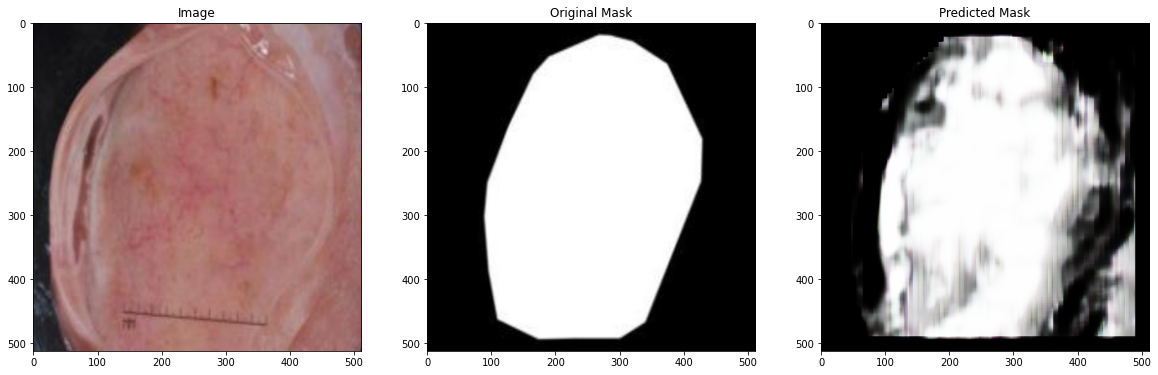

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Image')
plt.subplot(1,3,2)
plt.imshow(mask)
plt.title('Original Mask')
plt.subplot(1,3,3)
plt.imshow(pred[0,:,:,:])
plt.title('Predicted Mask')
plt.show()